In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
path_data = "/glade/p/cisl/aiml/hwt_mode/HWT_2021/labels/HRRR_rerun/"
files_mod = [f for f in os.listdir(path_data) if f.startswith('mod')]
files_cnn = [f for f in os.listdir(path_data) if f.startswith('cnn')]

cnn_to_mod_dict = {0: 1,
                   1: 2,
                   2: 0}


In [3]:
df_mod = pd.read_parquet(os.path.join(path_data, files_mod[0]))
df_cnn = pd.read_parquet(os.path.join(path_data, files_cnn[0]))
df_cnn.replace({"label_int": cnn_to_mod_dict}, inplace=True)


In [4]:
df_mod['date'] = df_mod['time'].dt.date
df_cnn['date'] = df_cnn['time'].dt.date


In [5]:
print(df_cnn.columns)
list(set(df_mod.columns) - set(df_cnn.columns))

Index(['time', 'forecast_hour', 'centroid_lon', 'centroid_lat', 'centroid_i',
       'centroid_j', 'track_id', 'track_step', 'run_date', 'label',
       'label_int', 'label_prob', 'QLCS', 'QLCS_prob', 'Supercell',
       'Supercell_prob', 'Disorganized', 'Disorganized_prob', 'x', 'y', 'lat',
       'lon', 'MAX_UPHL', 'date'],
      dtype='object')


['cluster',
 'cluster_5_prob',
 'cluster_6_prob',
 'cluster_3_prob',
 'cluster_0_prob',
 'cluster_4_prob',
 'cluster_2_prob',
 'cluster_1_prob']

In [6]:
df_mod = pd.DataFrame()
for f in files_mod:
    df_mod = df_mod.append(pd.read_parquet(os.path.join(path_data, f)))

df_cnn = pd.DataFrame()
for f in files_cnn:
    df_cnn = df_cnn.append(pd.read_parquet(os.path.join(path_data, f)))
df_cnn.replace({"label_int": cnn_to_mod_dict}, inplace=True)


In [7]:
df_mod['date'] = df_mod['time'].dt.date
df_cnn['date'] = df_cnn['time'].dt.date


In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
ax = df_mod.groupby(['time']).std()['label_int'].plot(label='label_int')
ax.legend()
ax1 = ax.twinx()
df_mod.groupby(['time']).std()['MAX_UPHL'].plot(ax=ax1, color='r', label='MAX_UPHL')
plt.legend(loc='upper left')
plt.title('GMM')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
ax = df_cnn.groupby(['time']).std()['label_int'].plot(label='label_int')
ax.legend()
ax1 = ax.twinx()
df_cnn.groupby(['time']).std()['MAX_UPHL'].plot(ax=ax1, color='r', label='MAX_UPHL')
plt.legend(loc='upper left')
plt.title('CNN')
plt.show()


In [ ]:
model = 'hrrr'
fig, ax = plt.subplots()
df_mod.groupby(['time','label_int']).size().unstack().apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
ax.legend(['Disorganized', 'QLCS', 'Supercell'])
plt.title('GMM')
plt.locator_params(axis='x', nbins=10)
plt.savefig(f"figures/{model}_label_by_hour_gmm.png", dpi=300)
plt.show()


In [ ]:
fig, ax = plt.subplots()
df_cnn.groupby(['time','label_int']).size().unstack().apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
ax.legend(['Disorganized', 'QLCS', 'Supercell'])
plt.title('CNN')
plt.locator_params(axis='x', nbins=10)
plt.savefig(f"figures/{model}_label_by_hour_cnn.png", dpi=300)
plt.show()


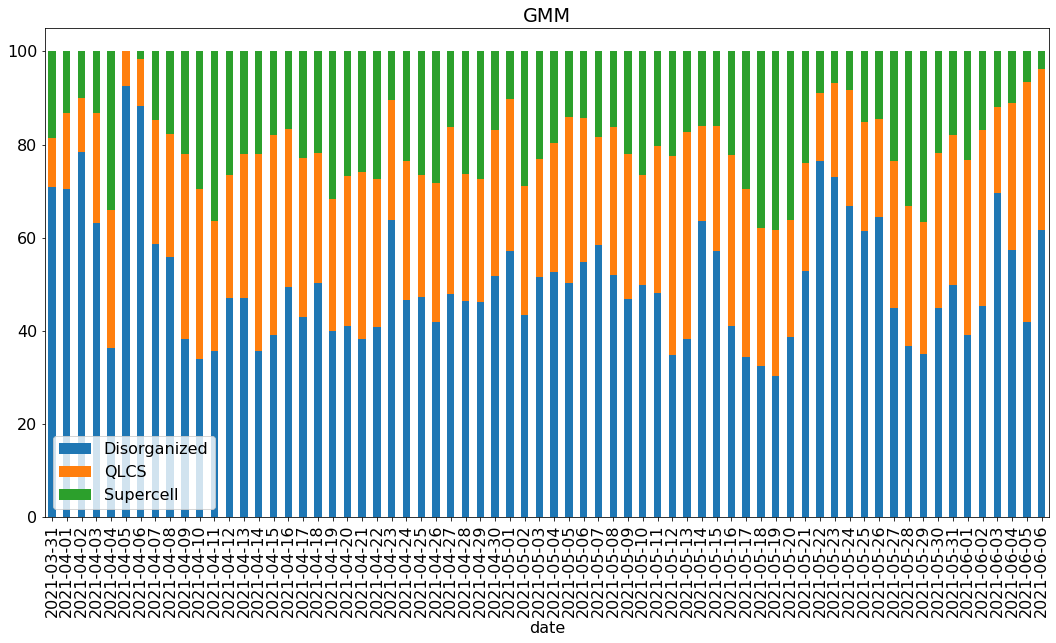

In [9]:
model = 'hrrr'
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots()
df_mod.groupby(['date','label_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
ax.legend(['Disorganized', 'QLCS', 'Supercell'])
plt.title('GMM')
plt.savefig(f"figures/{model}_label_by_date_gmm.png", dpi=300, bbox_inches='tight')
plt.show()


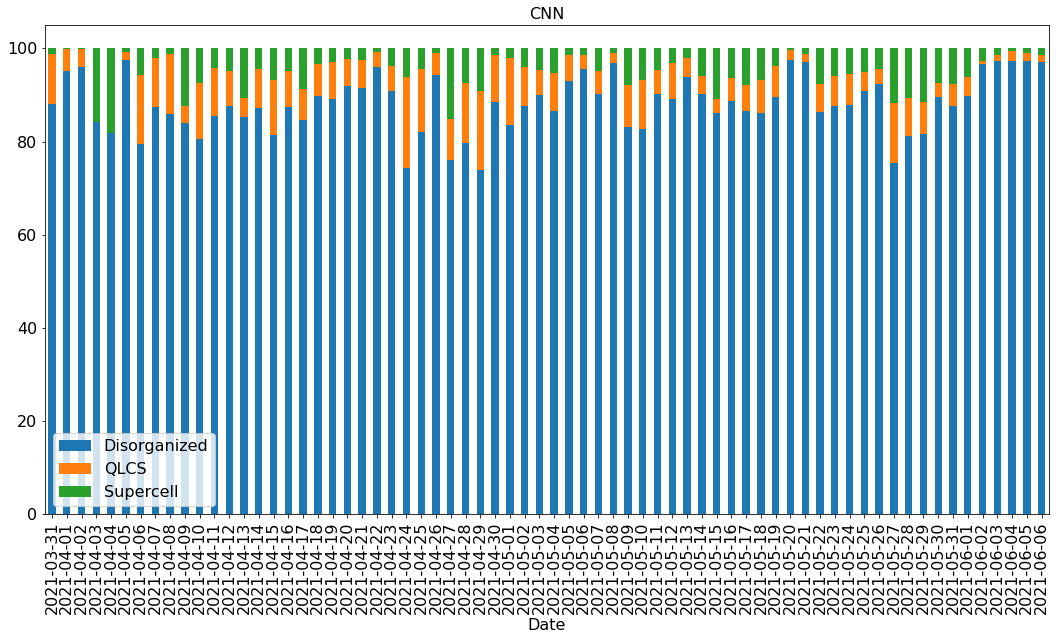

In [10]:
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots()
df_cnn.groupby(['date','label_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax)
ax.legend(['Disorganized', 'QLCS', 'Supercell'], fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.title('CNN', fontsize=16)
plt.savefig(f"figures/{model}_label_by_date_cnn.png", dpi=300, bbox_inches='tight')
plt.show()


/glade/work/ggantos/miniconda2/envs/holo_torch/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


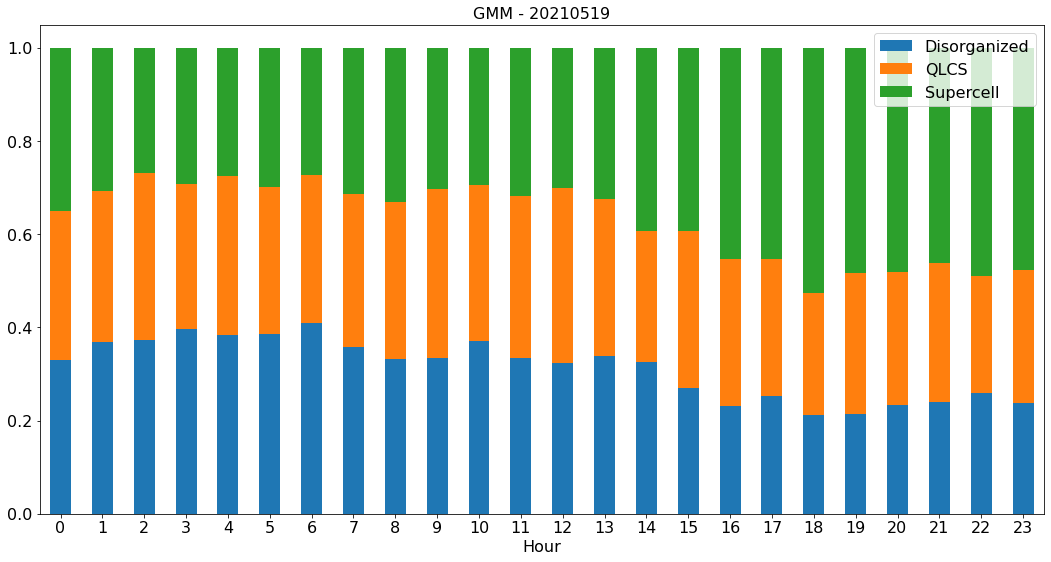

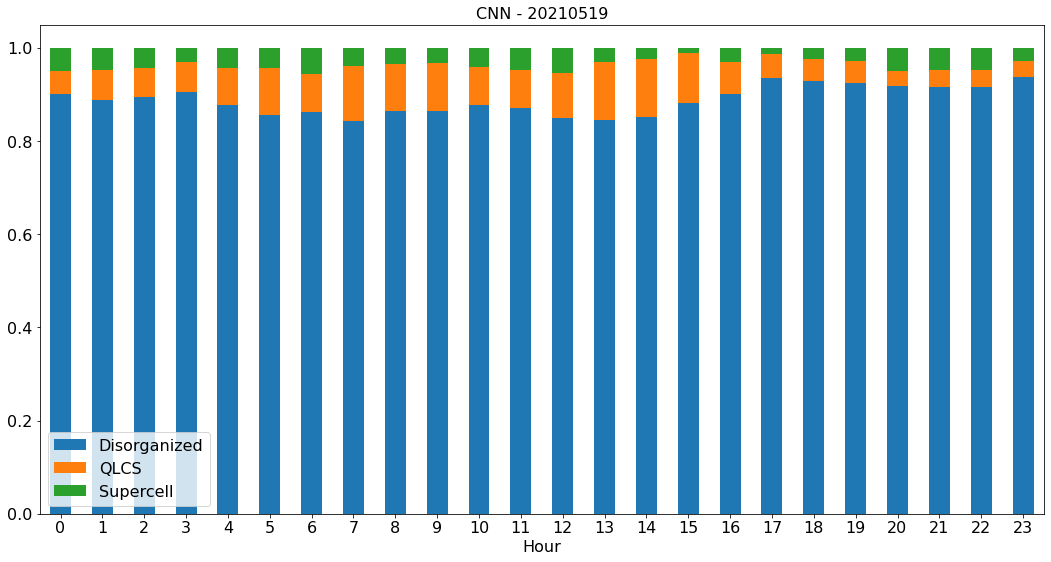

In [11]:
date = '20210519'

for name, df in zip(['gmm', 'cnn'], [df_mod, df_cnn]):
    plt.rcParams['font.size'] = 16
    fig, ax = plt.subplots()
    fig.canvas.draw()
    df[df['date'] == datetime.strptime(date, '%Y%m%d').date()].groupby(['time','label_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax, fontsize=16)
    labels = [datetime.strptime(item.get_text(), '%Y-%m-%d %H:%M:%S').hour for item in ax.get_xticklabels()]
    labels_y = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels_y, fontsize=16)
    ax.set_xticklabels(labels, rotation = 0, fontsize=16)
    ax.legend(['Disorganized', 'QLCS', 'Supercell'], fontsize=16)
    ax.set_xlabel('Hour', fontsize=16)
    plt.title(f'{name.upper()} - {date}', fontsize=16)
    plt.savefig(f"figures/{model}_label_by_hour_{name}_{date}.png", dpi=300, bbox_inches='tight')
    plt.show()


/glade/work/ggantos/miniconda2/envs/holo_torch/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


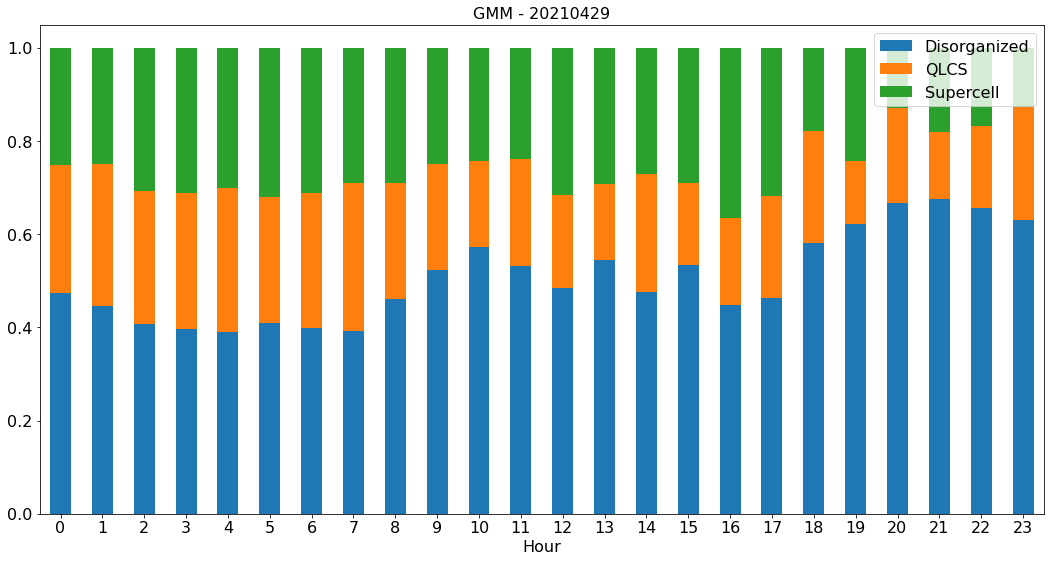

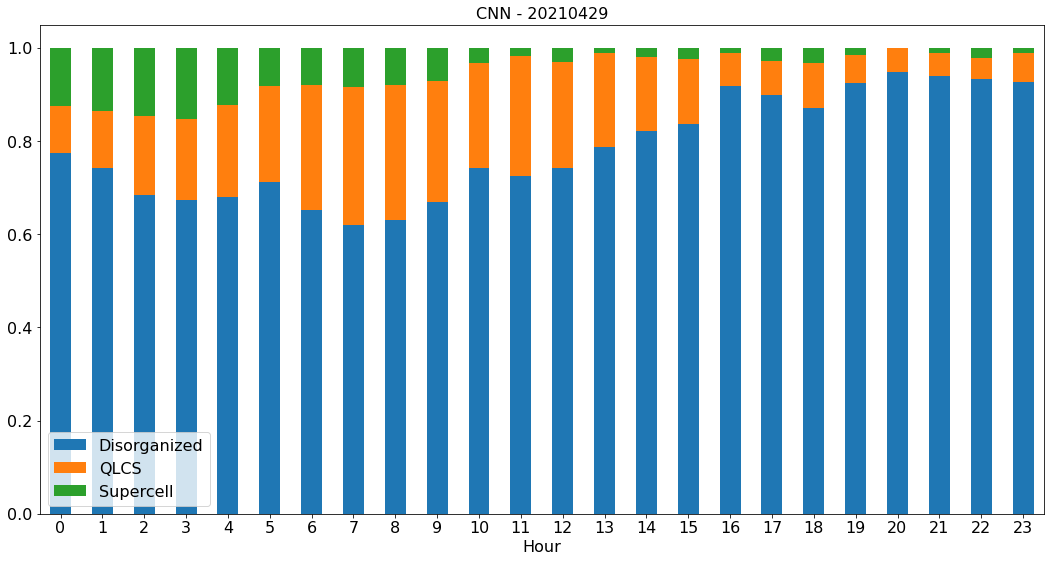

In [12]:
date = '20210429'

for name, df in zip(['gmm', 'cnn'], [df_mod, df_cnn]):
    plt.rcParams['font.size'] = 16
    fig, ax = plt.subplots()
    fig.canvas.draw()
    df[df['date'] == datetime.strptime(date, '%Y%m%d').date()].groupby(['time','label_int']).size().unstack().fillna(0).apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar', stacked=True, figsize=(18,9), ax=ax, fontsize=16)
    labels = [datetime.strptime(item.get_text(), '%Y-%m-%d %H:%M:%S').hour for item in ax.get_xticklabels()]
    labels_y = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels_y, fontsize=16)
    ax.set_xticklabels(labels, rotation = 0, fontsize=16)
    ax.legend(['Disorganized', 'QLCS', 'Supercell'], fontsize=16)
    ax.set_xlabel('Hour', fontsize=16)
    plt.title(f'{name.upper()} - {date}', fontsize=16)
    plt.savefig(f"figures/{model}_label_by_hour_{name}_{date}.png", dpi=300, bbox_inches='tight')
    plt.show()
